# Predict ENERGY STAR Score

#### The goal is to predict the ENERGY STAR Score of a building based on historical data

ENERGY STAR score is an external benchmark for assessing the energy performance of commercial buildings. The ENERGY STAR score is expressed as a number on a simple 1 - 100 scale. First introduced in 1999, the score has been adopted by leading organizations across the United States because it offers a simple way to evaluate measured energy use, prioritize investments, and communicate relative performance across a portfolio of buildings.

## Importing Libraries

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Getting Data

In [2]:
df = pd.read_csv("Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv")

In [3]:
df.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

- There are 60 columns and 11746 rows
- There is missing data
- Also there are many values that are 'Not Available'

ENERGY STAR Score mainly depends on amount of energy consumption from different sources, hours of operation, location and the footfall.

Reference document :  https://portfoliomanager.energystar.gov/pdf/reference/ENERGY%20STAR%20Score.pdf?_gl=1*1m3bkul*_ga*MTg5OTE0NzEwNy4xNjg2MTE1NjY5*_ga_S0KJTVVLQ6*MTY4NjMzMzAyMC43LjEuMTY4NjMzMzAzMC4wLjAuMA


## Data Pre-processing and Exploration

In [5]:
#Checking for duplicate records
df.duplicated().sum()

0

In [6]:
#Treating all values that are 'Not Available' as missing values
df = df.replace({'Not Available':np.nan})

In [7]:
#Percentage of Missing value
df.isnull().sum()/len(df)*100

Order                                                          0.000000
Property Id                                                    0.000000
Property Name                                                  0.000000
Parent Property Id                                             0.000000
Parent Property Name                                           0.000000
BBL - 10 digits                                                0.093649
NYC Borough, Block and Lot (BBL) self-reported                 0.093649
NYC Building Identification Number (BIN)                       1.379193
Address 1 (self-reported)                                      0.000000
Address 2                                                     98.237698
Postal Code                                                    0.000000
Street Number                                                  1.055679
Street Name                                                    1.038651
Borough                                                        1

In [8]:
#Dropping all identity columns 
df.drop(columns = ['Order', 'Property Id', 'Property Name', 'Parent Property Id',
       'Parent Property Name', 'BBL - 10 digits',
       'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Postal Code', 'Street Number', 'Street Name'],inplace=True)

In [9]:
#Converting columns to numerical values
num_cols = [
       'DOF Gross Floor Area',       
       'Largest Property Use Type - Gross Floor Area (ft²)',       
       '2nd Largest Property Use - Gross Floor Area (ft²)',       
       '3rd Largest Property Use Type - Gross Floor Area (ft²)', 'Year Built',
       'Number of Buildings - Self-reported', 'Occupancy',
       'ENERGY STAR Score',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kWh/ft²)',
       'Weather Normalized Site Natural Gas Intensity (therms/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Fuel Oil #1 Use (kBtu)',
       'Fuel Oil #2 Use (kBtu)', 'Fuel Oil #4 Use (kBtu)',
       'Fuel Oil #5 & 6 Use (kBtu)', 'Diesel #2 Use (kBtu)',
       'District Steam Use (kBtu)', 'Natural Gas Use (kBtu)',
       'Weather Normalized Site Natural Gas Use (therms)',
       'Electricity Use - Grid Purchase (kBtu)',
       'Weather Normalized Site Electricity (kWh)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Direct GHG Emissions (Metric Tons CO2e)',
       'Indirect GHG Emissions (Metric Tons CO2e)',
       'Property GFA - Self-Reported (ft²)',
       'Water Use (All Water Sources) (kgal)',
       'Water Intensity (All Water Sources) (gal/ft²)',
       'Source EUI (kBtu/ft²)']
for col in num_cols:
    df[col] = pd.to_numeric(df[col])

In [10]:
#Since ENERGY STAR score column itself has missing values, we must drop these rows first
df= df.dropna(subset = ['ENERGY STAR Score']).reset_index()
df=df.drop(columns=["index"])

In [11]:
#Percentage of Missing value
df.isnull().sum()/len(df)*100

Address 2                                                     98.413192
Borough                                                        0.653391
DOF Gross Floor Area                                           0.653391
Primary Property Type - Self Selected                          0.000000
List of All Property Use Types at Property                     0.000000
Largest Property Use Type                                      0.000000
Largest Property Use Type - Gross Floor Area (ft²)             0.000000
2nd Largest Property Use Type                                 75.326696
2nd Largest Property Use - Gross Floor Area (ft²)             75.326696
3rd Largest Property Use Type                                 91.972620
3rd Largest Property Use Type - Gross Floor Area (ft²)        91.972620
Year Built                                                     0.000000
Number of Buildings - Self-reported                            0.000000
Occupancy                                                      0

In [12]:
#Identify columns with more than 50% Missing value
mv = dict(df.isnull().sum()/len(df)*100)
drop_cols = []
for k,v in mv.items():
    if v > 50:
        drop_cols.append(k)

In [13]:
#Dropping columns with more than 50% missing values
df = df.drop(columns = drop_cols)

In [14]:
#Checking administrative columns
cols = ['DOF Benchmarking Submission Status', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'Census Tract', 'NTA']
for col in cols:
    print(f"Unique values in {col} : {df[col].unique()}")
    print(f"Total number of unique values in {col} : {df[col].nunique()}")
    print('-'*100)

Unique values in DOF Benchmarking Submission Status : ['In Compliance' nan]
Total number of unique values in DOF Benchmarking Submission Status : 1
----------------------------------------------------------------------------------------------------
Unique values in Latitude : [40.841402 40.761395       nan ... 40.692602 40.670728 40.685549]
Total number of unique values in Latitude : 7619
----------------------------------------------------------------------------------------------------
Unique values in Longitude : [-73.942568 -73.957726        nan ... -73.993231 -73.971752 -73.96831 ]
Total number of unique values in Longitude : 7500
----------------------------------------------------------------------------------------------------
Unique values in Community Board : [12.  8. nan  2. 11.  9.  3.  7. 10. 13.  1.  4. 14.  6.  5. 15. 16. 18.
 17. 56.]
Total number of unique values in Community Board : 19
-----------------------------------------------------------------------------------

- All DOF Benchmarking are in compliance
- Since all buildings are in the area of New York, Latitude and Longitude can be ignored
- Community Board, Census Tract, Council District and NTA are all administrative columns

Hence, all the above columns can be dropped

In [15]:
df.drop(columns = cols, inplace=True)


The calculation of ENERGY STAR differs with the type of property. There is Campus score and Building score. 

- 'Senior Care Community','K-12 School','Multifamily Housing','Hotel','Hospital (General Medical & Surgical)' have been classified as campus.
- The rest have been classified as building.

Reference document : https://portfoliomanager.energystar.gov/pdf/reference/ENERGY%20STAR%20Score.pdf?_gl=1*1m3bkul*_ga*MTg5OTE0NzEwNy4xNjg2MTE1NjY5*_ga_S0KJTVVLQ6*MTY4NjMzMzAyMC43LjEuMTY4NjMzMzAzMC4wLjAuMA


In [16]:
#Dividing all Primary Property types into Campus and Building as per technical reference document
df['Campus_or_Building'] = df['Primary Property Type - Self Selected'].copy()
campus = ['Senior Care Community','K-12 School','Multifamily Housing','Hotel','Hospital (General Medical & Surgical)']
building = ['Office', 'Residence Hall/Dormitory', 'Medical Office','Bank Branch','Retail Store', 'College/University', 'Other',
           'Financial Office', 'Non-Refrigerated Warehouse',
       'Worship Facility', 'Distribution Center',
       'Fitness Center/Health Club/Gym', 'Mixed Use Property',
       'Self-Storage Facility', 'Supermarket/Grocery Store', 'Courthouse',
       'Wholesale Club/Supercenter', 'Refrigerated Warehouse',
       'Manufacturing/Industrial Plant', 'Residential Care Facility']
for i in campus:
    df['Campus_or_Building'] = df['Campus_or_Building'].replace({i:'Campus'})
for j in building:
    df['Campus_or_Building'] = df['Campus_or_Building'].replace({j:'Building'})
    

In [17]:
df['Campus_or_Building'].unique()

array(['Campus', 'Building'], dtype=object)

In [18]:
#Primary property already separated. Dropping redundant columns
df.drop(columns = ['List of All Property Use Types at Property',
                  'Largest Property Use Type','Largest Property Use Type - Gross Floor Area (ft²)'],inplace=True)

In [19]:
#Primary Property
df['Primary Property Type - Self Selected'].value_counts()

Multifamily Housing                      7524
Office                                   1167
Hotel                                     212
Non-Refrigerated Warehouse                149
Residence Hall/Dormitory                   97
Senior Care Community                      90
K-12 School                                79
Distribution Center                        62
Retail Store                               62
Hospital (General Medical & Surgical)      41
Other                                      32
Medical Office                             28
Supermarket/Grocery Store                  18
College/University                         16
Financial Office                           14
Mixed Use Property                         13
Refrigerated Warehouse                     12
Worship Facility                           10
Wholesale Club/Supercenter                  7
Self-Storage Facility                       3
Bank Branch                                 2
Fitness Center/Health Club/Gym    

In [20]:
#Selecting only top-10 Primary Properties for evaluation
pp = dict(df['Primary Property Type - Self Selected'].value_counts())
props = []
for k,v in pp.items():
    if v > 40:
        props.append(k)
#Replacing all other properties as Other        
c=0
for i in range(len(df)):
    if df['Primary Property Type - Self Selected'][c] not in props:
        df['Primary Property Type - Self Selected'][c] = 'Other'
    c=c+1

In [21]:
df['Primary Property Type - Self Selected'].value_counts()

Multifamily Housing                      7524
Office                                   1167
Hotel                                     212
Other                                     159
Non-Refrigerated Warehouse                149
Residence Hall/Dormitory                   97
Senior Care Community                      90
K-12 School                                79
Retail Store                               62
Distribution Center                        62
Hospital (General Medical & Surgical)      41
Name: Primary Property Type - Self Selected, dtype: int64

In [22]:
#Calculating building age for exploration
c = 0
df['Building Age'] = 0
for i in range(len(df)):
    df['Building Age'][c] = int(df['Release Date'][c].split(' ')[0].split('/')[2]) - df['Year Built'][c]
    c=c+1

In [23]:
#Dropping reduandant columns after calculating Building Age
df.drop(columns = ['Release Date','Year Built'],inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9642 entries, 0 to 9641
Data columns (total 27 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Borough                                                     9579 non-null   object 
 1   DOF Gross Floor Area                                        9579 non-null   float64
 2   Primary Property Type - Self Selected                       9642 non-null   object 
 3   Number of Buildings - Self-reported                         9642 non-null   int64  
 4   Occupancy                                                   9642 non-null   int64  
 5   Metered Areas (Energy)                                      9638 non-null   object 
 6   Metered Areas  (Water)                                      5901 non-null   object 
 7   ENERGY STAR Score                                           9642 non-null   float64
 8 

#### Plotting categorical columns

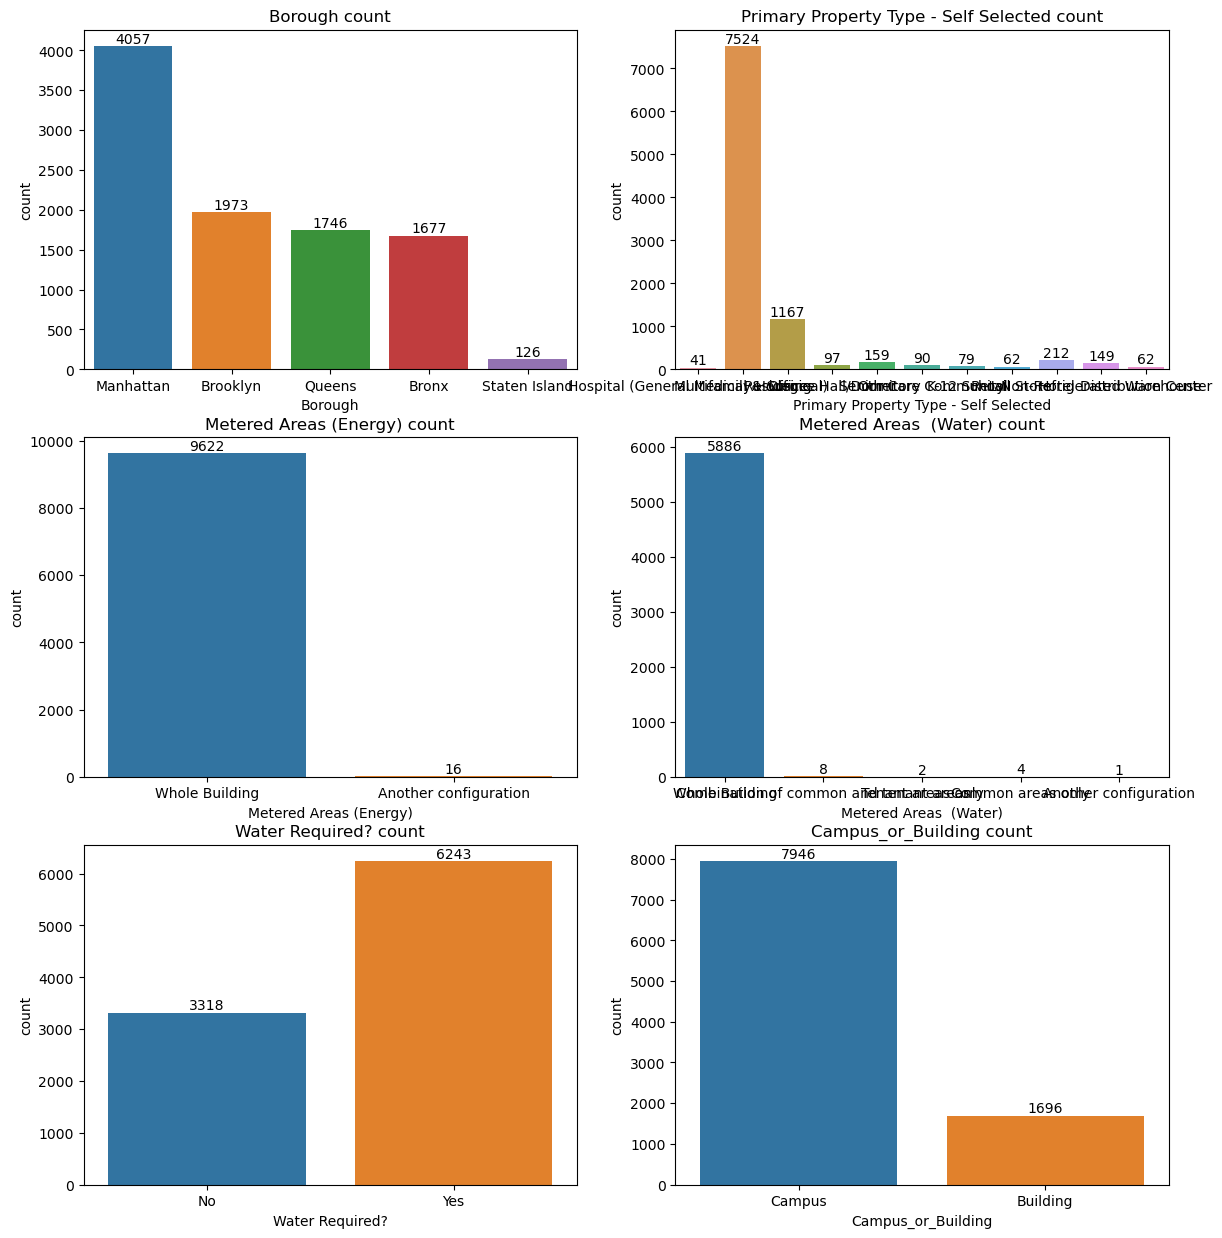

In [25]:
cat_cols = df.select_dtypes(include='object')
r=0
c=0
f,axes = plt.subplots(3,2,figsize=(14,15))
for col in cat_cols.columns:
    ax = sns.countplot(x = df[col],ax=axes[r,c])
    ax.set_title(f"{col} count")
    for i in ax.containers:
        ax.bar_label(i)
    c=c+1
    if c==2:
        r=r+1
        c=0


Clearly, metered columns are highly skewed and have low significance. Hence they can be dropped.

In [26]:
#Dropping Metered Areas columns
df.drop(columns = ['Metered Areas (Energy)', 'Metered Areas  (Water)'],inplace=True)

#### Plotting numerical columns

In [27]:
num_cols = df.select_dtypes(exclude='object')
len(num_cols.columns)

21

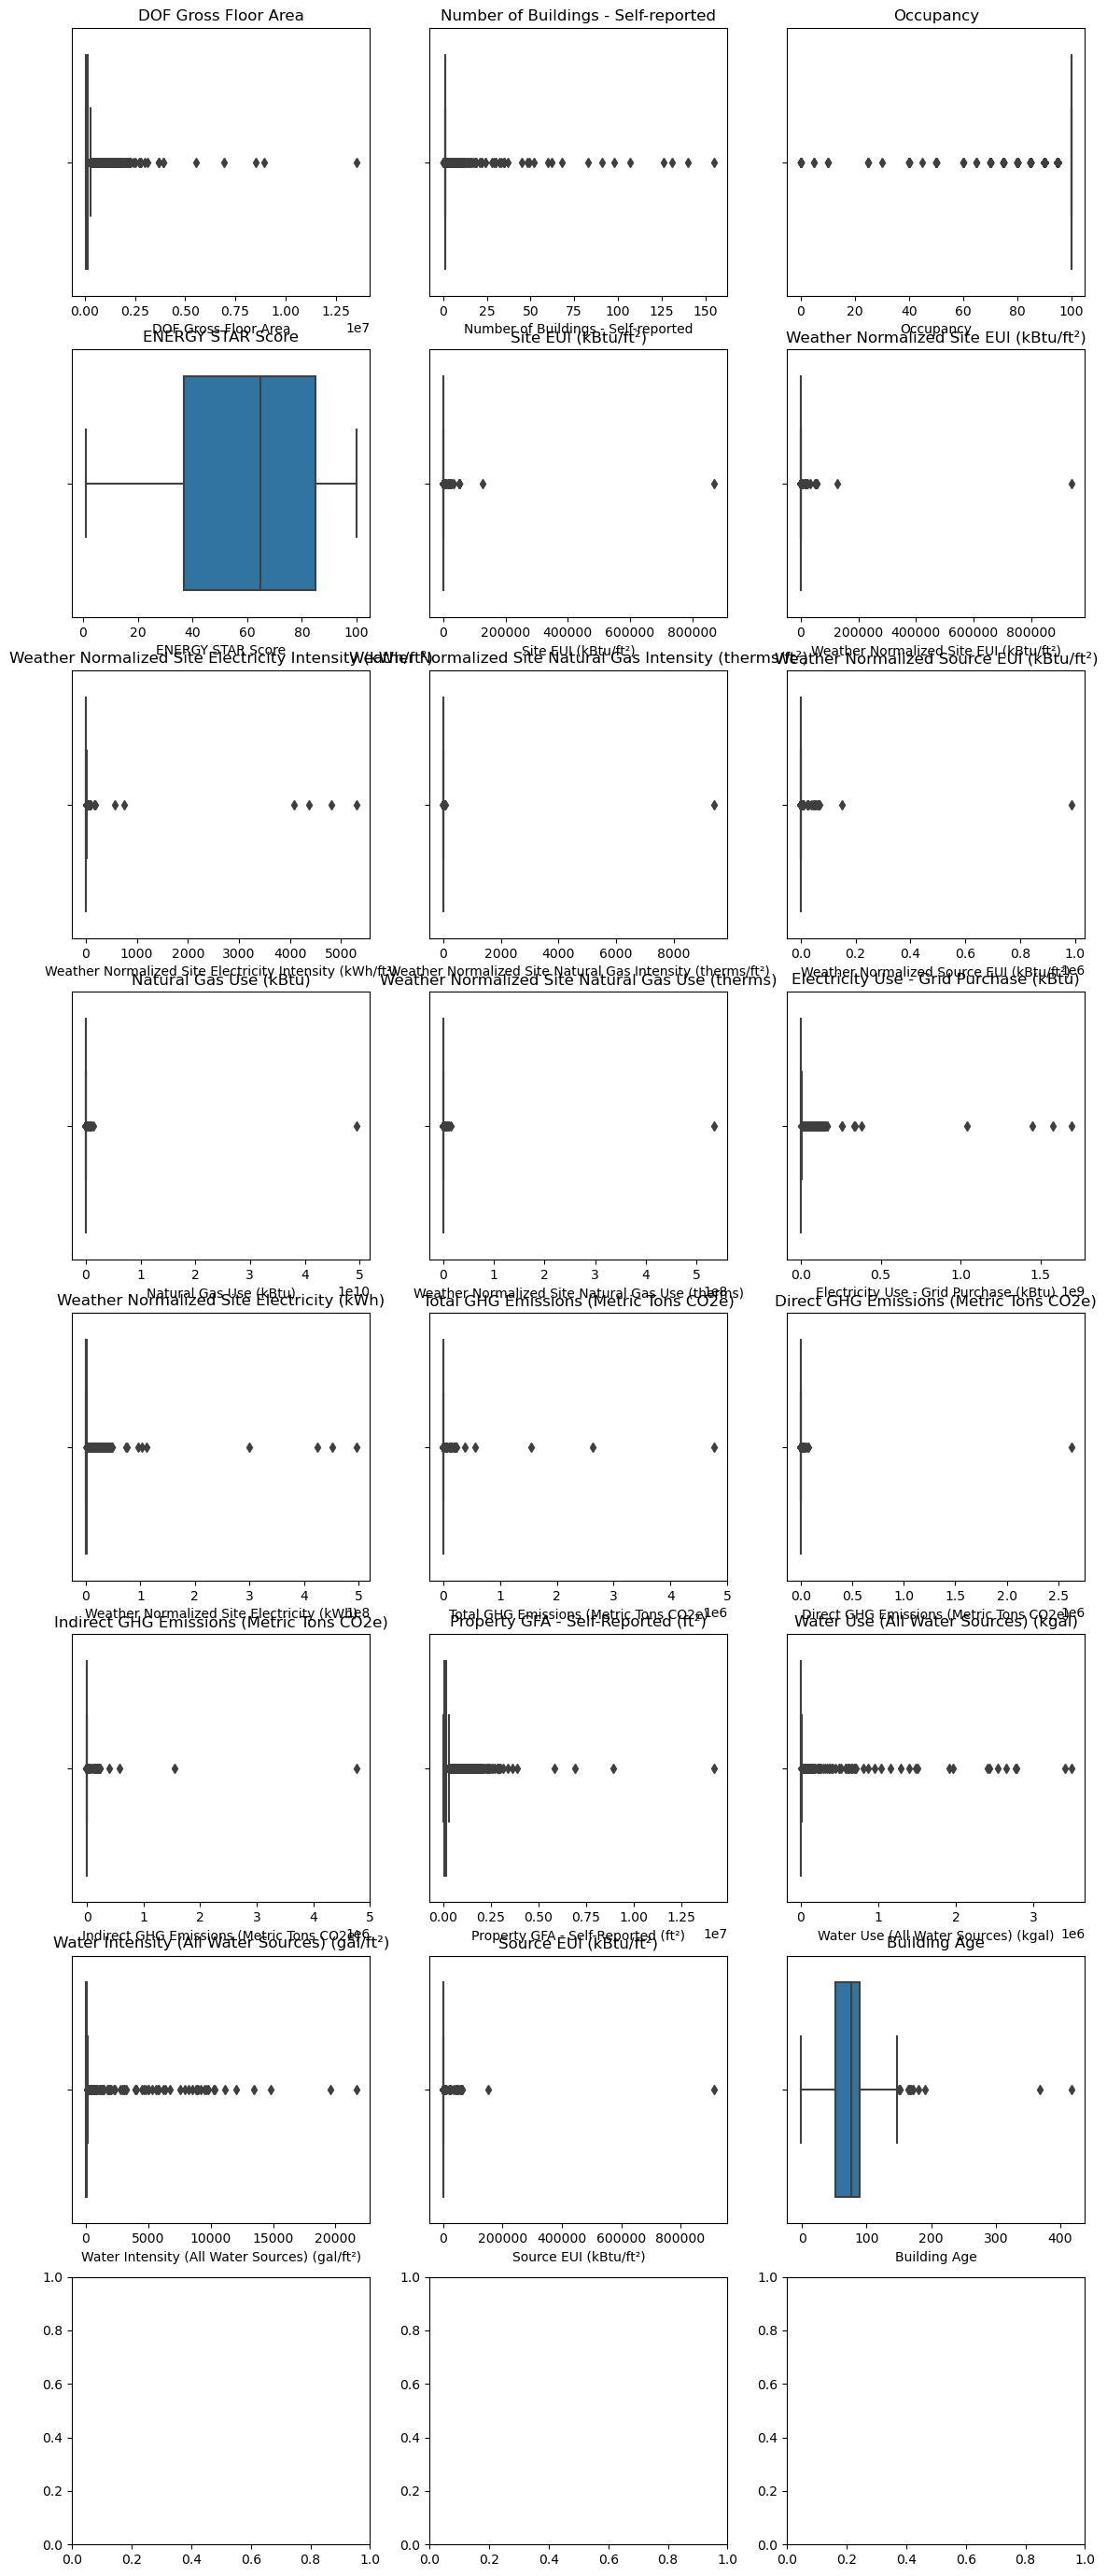

In [28]:
r = 0
c = 0
f,axes = plt.subplots(8,3, figsize=(14,35))
for col in num_cols:
    sns.boxplot(x = df[col], ax=axes[r,c]).set(title=col)
    c=c+1
    if c==3:
        r=r+1
        c=0

- Most columns have significantly high number of outliers because of which visualization will not be clear.
- From initial observations, there are also many missing values in these columns

Therefore, missing values must be imputed and outlier treatment needs to be done. 

In [29]:
#Keeping total number of buildings upto the range of 5
type([0])
num_buildings = [12,6,8,7,17,14,18,10,35,21,9,11,30,15,24,19,22,29,16,32,
        60,  48,  49,  45,  52,  91, 140, 126, 131, 107,37,68,83,
        98,  13, 155,  62,  28,  33]
df['Building_count'] = df['Number of Buildings - Self-reported'].copy()
for i in num_buildings:
    df['Building_count'] = df['Building_count'].replace({i:'5+'})

In [30]:
df = df.drop(columns = ['Number of Buildings - Self-reported'])

In [31]:
#Copying dataset before further processing
df1 = df.copy()

#### Since, Site and Source Energies are in KBtu/sft, all measurable quantities should be converted into the same unit.

The thermal conversion factors :
- 1 kBtu = 3.412 * kWh
- 1 kBtu = 100 * therm



Reference document : https://portfoliomanager.energystar.gov/pdf/reference/Thermal%20Conversions.pdf?_gl=1*7hz4nq*_ga*NjEzNTM3MzczLjE3MDk1MzA1MTc.*_ga_S0KJTVVLQ6*MTcwOTcyMTgxNS4zLjEuMTcwOTcyMjczNi4wLjAuMA..

In [32]:
df1['Weather Normalized Site Electricity (kWh)'] = df1['Weather Normalized Site Electricity (kWh)']*3.412
df1['Weather Normalized Site Natural Gas Use (therms)'] = df1['Weather Normalized Site Natural Gas Use (therms)']*100
df1['Weather Normalized Site Natural Gas Intensity (therms/ft²)'] = df1['Weather Normalized Site Natural Gas Intensity (therms/ft²)']*100
df1['Weather Normalized Site Electricity Intensity (kWh/ft²)'] = df1['Weather Normalized Site Electricity Intensity (kWh/ft²)']*3.412

In [33]:
#Renaming columns after unit conversion
df1 = df1.rename(columns = {'Weather Normalized Site Electricity (kWh)':'Weather Normalized Site Electricity (kBtu)',
           'Weather Normalized Site Electricity Intensity (kWh/ft²)':'Weather Normalized Site Electricity Intensity (kBtu/ft²)',
           'Weather Normalized Site Natural Gas Use (therms)':'Weather Normalized Site Natural Gas Use (kBtu)',
           'Weather Normalized Site Natural Gas Intensity (therms/ft²)':'Weather Normalized Site Natural Gas Intensity (kBtu/ft²)'})

In [34]:
#Total GHG Emissions - Dropping redundant columns
df1.drop(columns = ['Direct GHG Emissions (Metric Tons CO2e)',
       'Indirect GHG Emissions (Metric Tons CO2e)'],inplace=True)

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9642 entries, 0 to 9641
Data columns (total 23 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Borough                                                   9579 non-null   object 
 1   DOF Gross Floor Area                                      9579 non-null   float64
 2   Primary Property Type - Self Selected                     9642 non-null   object 
 3   Occupancy                                                 9642 non-null   int64  
 4   ENERGY STAR Score                                         9642 non-null   float64
 5   Site EUI (kBtu/ft²)                                       9642 non-null   float64
 6   Weather Normalized Site EUI (kBtu/ft²)                    8544 non-null   float64
 7   Weather Normalized Site Electricity Intensity (kBtu/ft²)  9150 non-null   float64
 8   Weather Normalized

#### We saw from earlier plots that most continuous colums have high outliers.  We cap these outliers before visualization to obtain a clearer understanding

In [36]:
#Copying data before treating outliers
dfo = df1.copy()

In [37]:
#Capping method for treating outliers
def treat_outlier(x):
    # taking 5,25, 75,95
    q5 = np.percentile(x,5)
    q25 = np.percentile(x,25)
    q75 = np.percentile(x,75)
    q95 = np.percentile(x,95)
    # calculating IQR 
    IQR = q75 - q25
    # calculating minimum and max threshold value
    lower_bound = q25 - 1.5 * IQR
    upper_bound = q75 + 1.5 * IQR
    print(q5, q25, q75, q95)
    # apply capping method
    return x.apply(lambda y: q95 if y > upper_bound else y).apply(lambda y :q5 if y < lower_bound else y )

In [38]:
#Dropping records with missing values
dfo= dfo.dropna(subset = ['Water Required?','Borough','Total GHG Emissions (Metric Tons CO2e)']).reset_index()
dfo=dfo.drop(columns=["index"])

In [39]:
#Imputing Water columns
water_cols = dfo[['Water Use (All Water Sources) (kgal)','Water Intensity (All Water Sources) (gal/ft²)','Water Required?']]
for col in water_cols.columns:
    dfo[col] = dfo[col].replace({np.nan:-1})

In [40]:
#Imputing water columns
c = 0
for i in range(len(dfo)):
    if dfo['Water Use (All Water Sources) (kgal)'][c]==-1 and dfo['Water Required?'][c]=='No':
        dfo['Water Use (All Water Sources) (kgal)'][c] = 0
        dfo['Water Intensity (All Water Sources) (gal/ft²)'][c] = 0
    elif dfo['Water Use (All Water Sources) (kgal)'][c]==-1 and dfo['Water Required?'][c]=='Yes':       
        dfo['Water Use (All Water Sources) (kgal)'][c] = dfo['Water Use (All Water Sources) (kgal)'].median()
        dfo['Water Intensity (All Water Sources) (gal/ft²)'][c] = dfo['Water Intensity (All Water Sources) (gal/ft²)'].median()
    c=c+1

In [41]:
dfo.isnull().sum()

Borough                                                        0
DOF Gross Floor Area                                           0
Primary Property Type - Self Selected                          0
Occupancy                                                      0
ENERGY STAR Score                                              0
Site EUI (kBtu/ft²)                                            0
Weather Normalized Site EUI (kBtu/ft²)                      1093
Weather Normalized Site Electricity Intensity (kBtu/ft²)     481
Weather Normalized Site Natural Gas Intensity (kBtu/ft²)    1393
Weather Normalized Source EUI (kBtu/ft²)                    1093
Natural Gas Use (kBtu)                                       983
Weather Normalized Site Natural Gas Use (kBtu)              1393
Electricity Use - Grid Purchase (kBtu)                        67
Weather Normalized Site Electricity (kBtu)                   481
Total GHG Emissions (Metric Tons CO2e)                         0
Property GFA - Self-Repor

In [42]:
#Replacing remaining missing values with median values
ms = ['Weather Normalized Site Electricity Intensity (kBtu/ft²)','Weather Normalized Site Natural Gas Intensity (kBtu/ft²)',
     'Natural Gas Use (kBtu)','Weather Normalized Site Natural Gas Use (kBtu)','Electricity Use - Grid Purchase (kBtu)',
     'Weather Normalized Site Electricity (kBtu)','Weather Normalized Site EUI (kBtu/ft²)',
      'Weather Normalized Source EUI (kBtu/ft²)']
for col in ms:
    dfo[col].fillna(dfo[col].median(),inplace=True)

In [43]:
#Treating outliers
num_cols = [
       'DOF Gross Floor Area','Property GFA - Self-Reported (ft²)',
       'Site EUI (kBtu/ft²)', 'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kBtu/ft²)',
       'Weather Normalized Site Natural Gas Intensity (kBtu/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Natural Gas Use (kBtu)',
       'Weather Normalized Site Natural Gas Use (kBtu)',
       'Electricity Use - Grid Purchase (kBtu)',
       'Weather Normalized Site Electricity (kBtu)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Water Use (All Water Sources) (kgal)',
       'Water Intensity (All Water Sources) (gal/ft²)','Building Age',
       'Source EUI (kBtu/ft²)']
for col in num_cols:
    dfo[col] = treat_outlier(dfo[col])

52802.8 65000.0 153803.0 498760.9499999977
53336.15 66913.25 153125.5 469995.5
25.245000000000005 63.1 97.0 147.7
28.245000000000005 69.0 99.0 148.1
8.188799999999999 12.965599999999998 28.3196 61.416
0.0 20.0 70.0 100.0
62.245000000000005 107.6 157.8 258.4549999999999
111173.565 1688101.875 6355126.325 18165482.944999985
120280.00000000001 2071720.0 6618317.499999999 18399819.99999995
585967.8450000001 1023172.0 4055887.375 17840463.929999977
598219.5625 1033649.1077 3861995.3732000003 17245939.328399953
167.235 335.525 887.25 3094.6999999999985
0.0 2369.425 6184.675 16620.55
0.0 24.3325 58.597500000000004 120.66149999999976
10.0 52.0 90.0 108.0
54.69000000000001 100.1 159.6 263.8549999999999


## Visualization

<Axes: xlabel='Property GFA - Self-Reported (ft²)', ylabel='ENERGY STAR Score'>

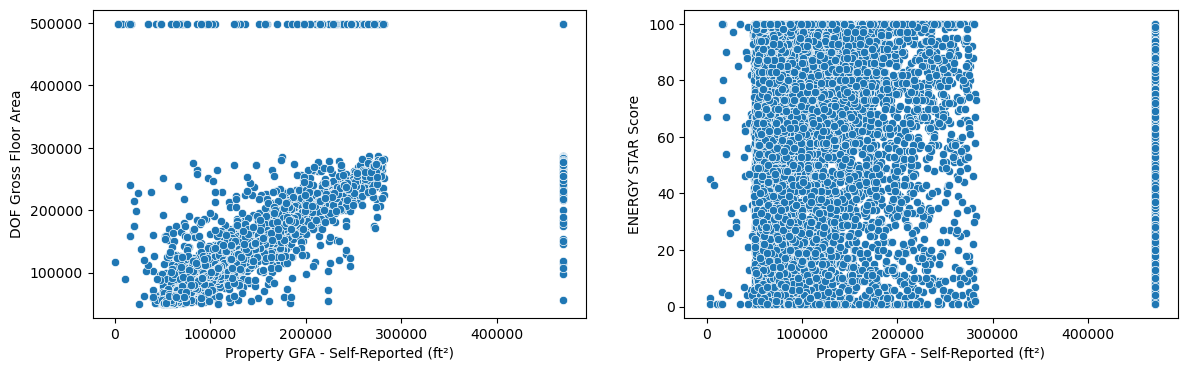

In [44]:
#Area and ENERGY STAR
f,axes = plt.subplots(1,2,figsize=(14,4))
sns.scatterplot(x = dfo['Property GFA - Self-Reported (ft²)'],y=dfo['DOF Gross Floor Area'],ax=axes[0])
sns.scatterplot(x = dfo['Property GFA - Self-Reported (ft²)'],y=dfo['ENERGY STAR Score'],ax=axes[1])

DOF Floor Area and Property GFA is linearly related. DOF Floor area can be dropped.

<Axes: xlabel='ENERGY STAR Score', ylabel='Count'>

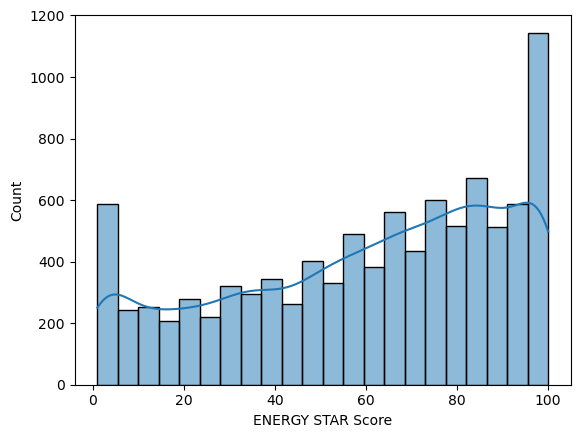

In [45]:
#ENERGY STAR Score
sns.histplot(x = df1['ENERGY STAR Score'],kde=True)

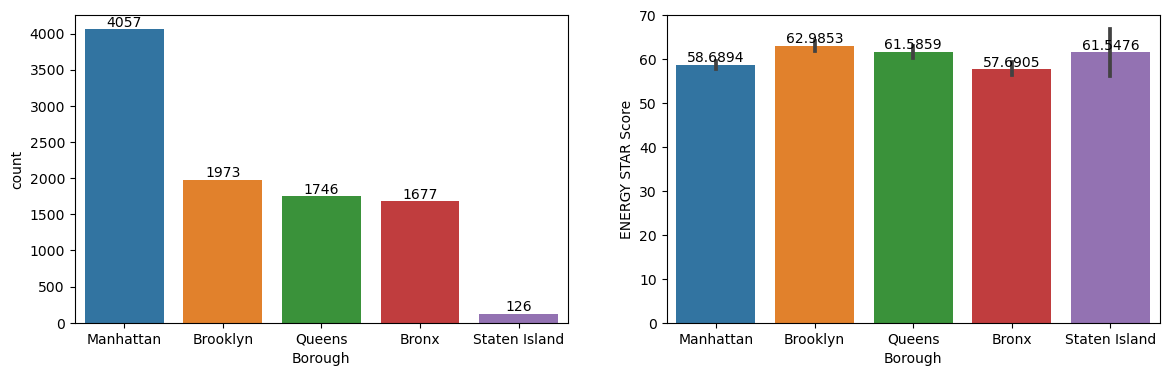

In [46]:
#Borough-wise ENERGY STAR Score
f,axes=plt.subplots(1,2,figsize=(14,4))
ax = sns.countplot(x = df1['Borough'],ax=axes[0])
for i in ax.containers:
    ax.bar_label(i)
ax = sns.barplot(x = df1['Borough'],y=df1['ENERGY STAR Score'],ax=axes[1])
for i in ax.containers:
    ax.bar_label(i)

- Staten Island has lowest count of buldings. It still has a high mean ENERGY STAR Score.
- Manhattan has the highest count of buildings
- Bronx has the lowest mean ENERGY STAR score
- Brooklyn has the highest mean ENERGY STAR Score


<Axes: xlabel='ENERGY STAR Score', ylabel='Site EUI (kBtu/ft²)'>

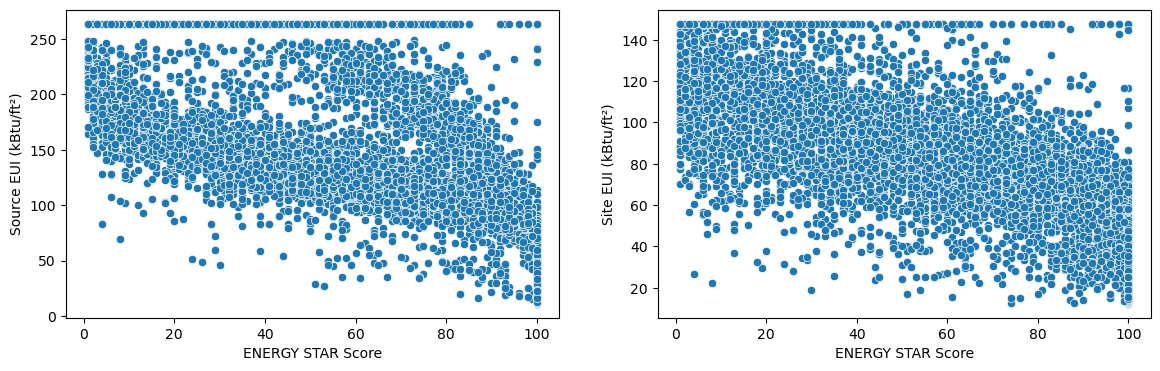

In [47]:
#Source/Site energy and ENERGY STAR score
f,axes = plt.subplots(1,2,figsize=(14,4))
sns.scatterplot(x = dfo['ENERGY STAR Score'], y = dfo['Source EUI (kBtu/ft²)'],ax=axes[0])
sns.scatterplot(x = dfo['ENERGY STAR Score'], y = dfo['Site EUI (kBtu/ft²)'],ax=axes[1])

Clearly ENERGY STAR Score decreases with increase in Source and Site Energy

<Axes: xlabel='Campus_or_Building', ylabel='ENERGY STAR Score'>

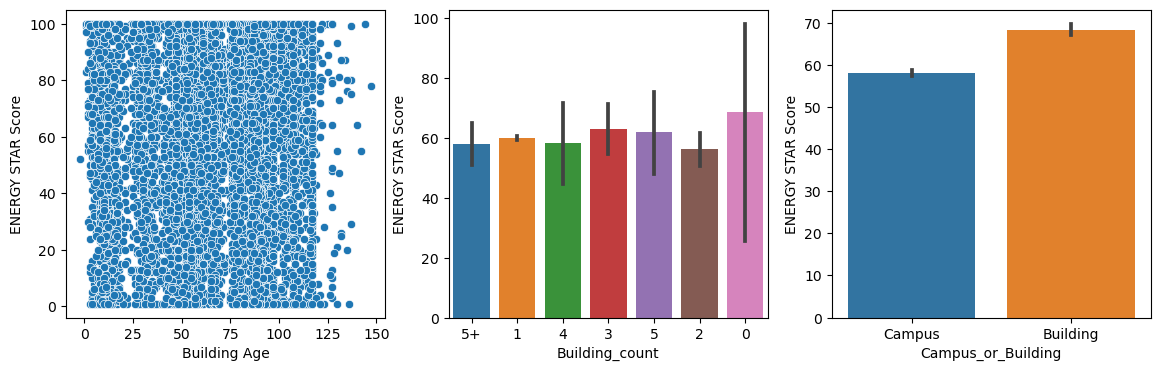

In [48]:
#Building properties vs ENERGY STAR
f,axes = plt.subplots(1,3,figsize=(14,4))
sns.scatterplot(x = dfo['Building Age'],y=dfo['ENERGY STAR Score'],ax=axes[0])
sns.barplot(x = dfo['Building_count'],y=dfo['ENERGY STAR Score'],ax=axes[1])
sns.barplot(x = dfo['Campus_or_Building'],y=dfo['ENERGY STAR Score'],ax=axes[2])

- No discernable pattern between Building age and ENERGY STAR.
- No discernable pattern between Building count and ENERGY STAR.
- Mean ENERGY STAR value is higher for buildings than campuses.

<Axes: xlabel='Occupancy', ylabel='ENERGY STAR Score'>

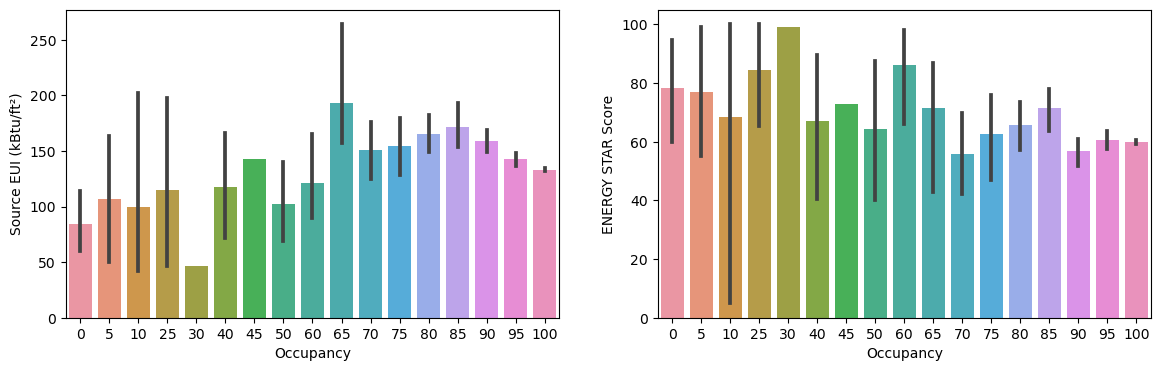

In [49]:
#Occupancy and Source Energy
f,axes = plt.subplots(1,2,figsize=(14,4))
sns.barplot(x = dfo['Occupancy'], y = dfo['Source EUI (kBtu/ft²)'],ax=axes[0])
sns.barplot(x = dfo['Occupancy'], y = dfo['ENERGY STAR Score'],ax=axes[1])

- In General, lesser occupancy buildings have higher ENERGY STAR
- It is also seems that Source EUI increases with occupancy

<Axes: xlabel='Water Intensity (All Water Sources) (gal/ft²)', ylabel='Source EUI (kBtu/ft²)'>

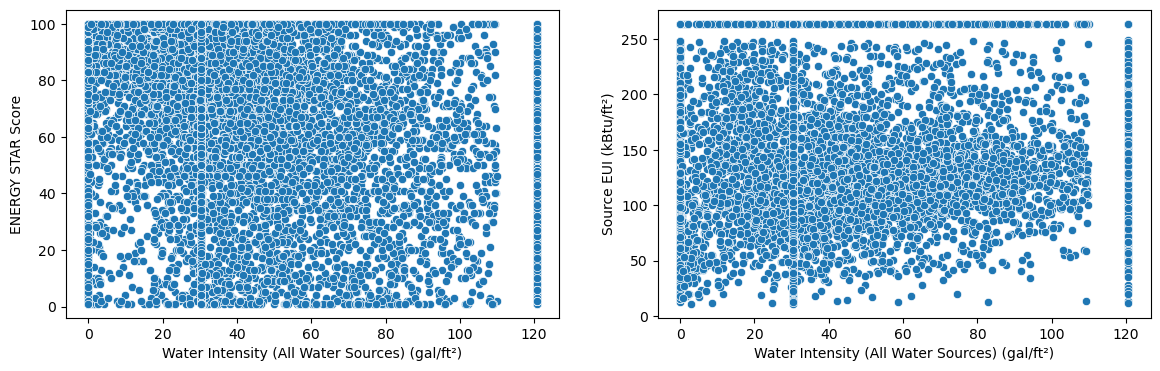

In [50]:
#Water Use, ENERGY STAR and Source Energy
f,axes = plt.subplots(1,2,figsize=(14,4))
sns.scatterplot(x = dfo['Water Intensity (All Water Sources) (gal/ft²)'],y=dfo['ENERGY STAR Score'],ax=axes[0])
sns.scatterplot(x = dfo['Water Intensity (All Water Sources) (gal/ft²)'],y=dfo['Source EUI (kBtu/ft²)'],ax=axes[1])
#OUtliers!!!

The pattern is not discernable. However, it can be said that as water intensity increases, ENERGY STAR Score decreases. 

<Axes: xlabel='Natural Gas Use (kBtu)', ylabel='Total GHG Emissions (Metric Tons CO2e)'>

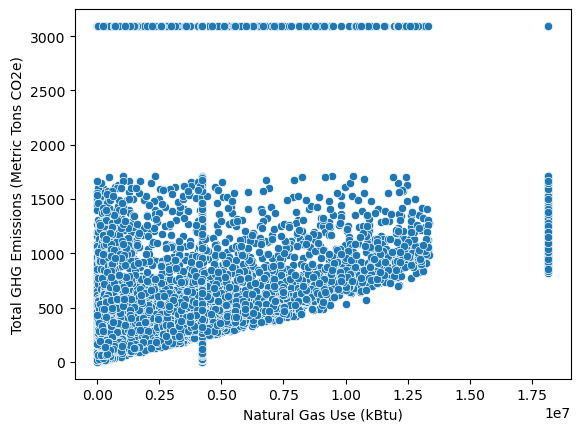

In [51]:
sns.scatterplot(x = dfo['Natural Gas Use (kBtu)'], y = dfo['Total GHG Emissions (Metric Tons CO2e)'])#Outliers!!!

Higher Use of Natural Gas increases Emissions

In [52]:
dfo.drop(columns = ['DOF Gross Floor Area'],inplace=True)

### Finding Correlations


<Axes: >

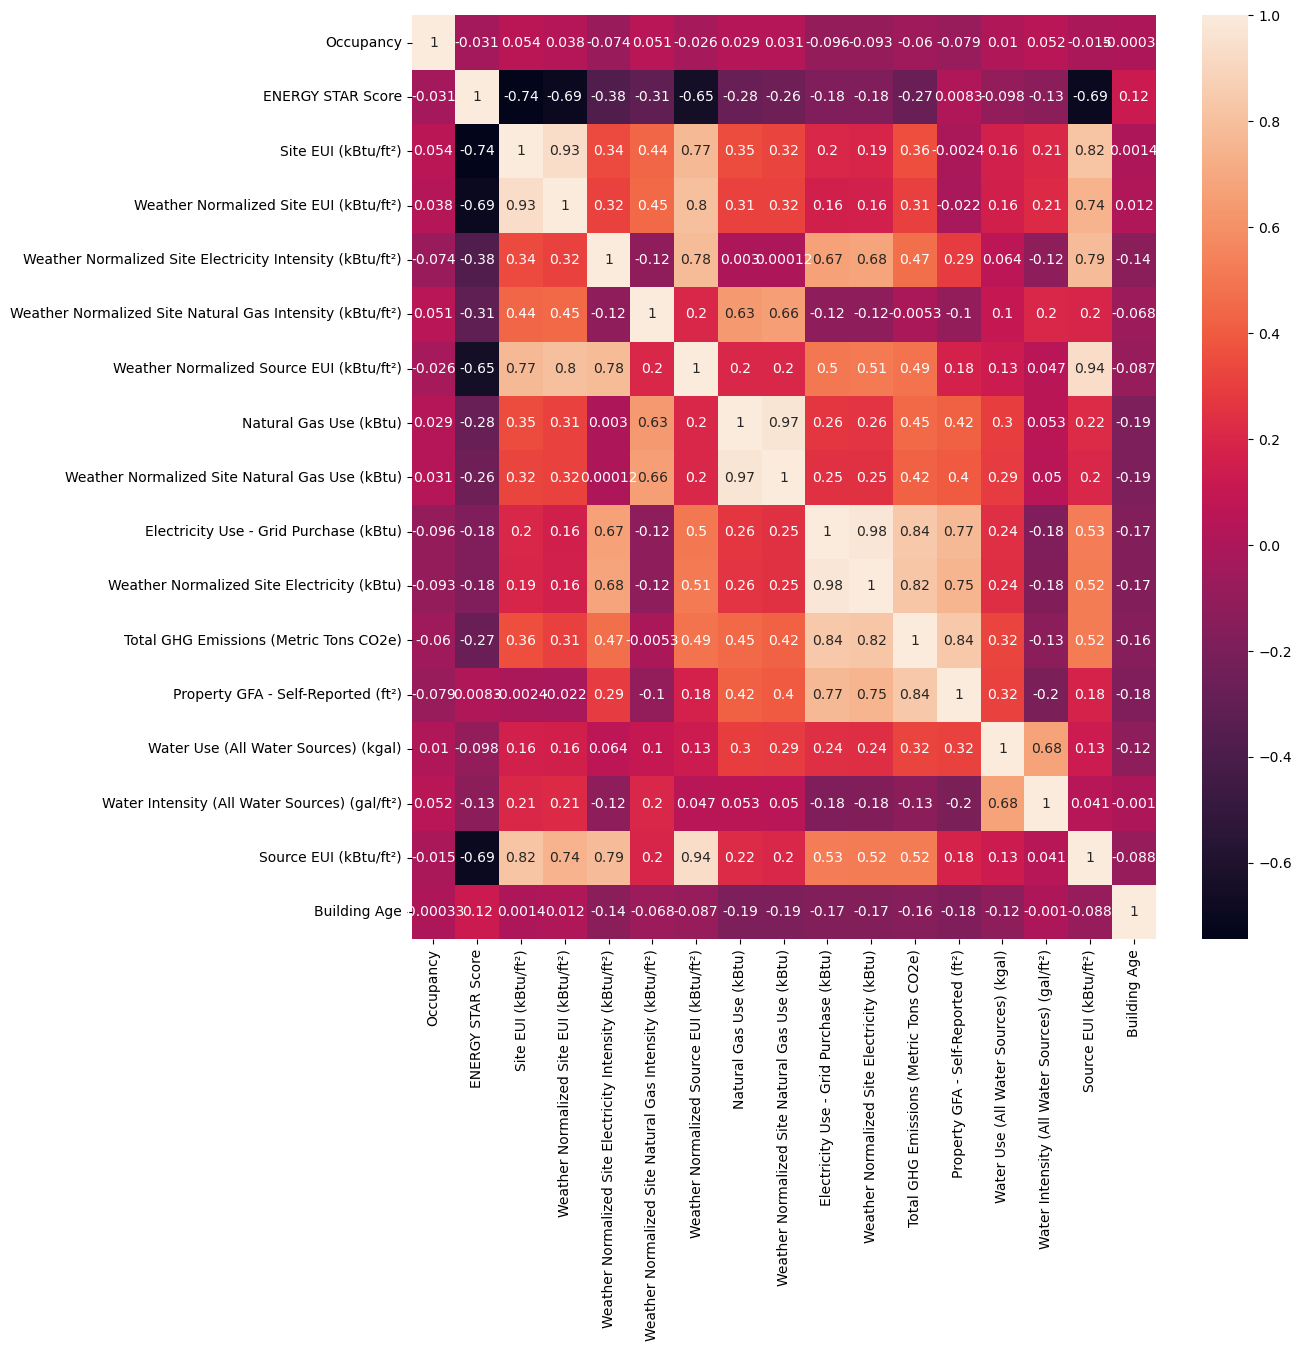

In [53]:
plt.figure(figsize=(12,12))
sns.heatmap(dfo.corr(),annot=True)

There is very high multicollinearity. We need to use Variance Inflation Factor to check variables with highest VIF values.

In [54]:
#Calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set 
X = dfo[['Occupancy',
       'Site EUI (kBtu/ft²)',
       'Weather Normalized Site EUI (kBtu/ft²)',
       'Weather Normalized Site Electricity Intensity (kBtu/ft²)',
       'Weather Normalized Site Natural Gas Intensity (kBtu/ft²)',
       'Weather Normalized Source EUI (kBtu/ft²)', 'Natural Gas Use (kBtu)',
       'Weather Normalized Site Natural Gas Use (kBtu)',
       'Electricity Use - Grid Purchase (kBtu)',
       'Weather Normalized Site Electricity (kBtu)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Property GFA - Self-Reported (ft²)',
       'Water Use (All Water Sources) (kgal)',
       'Water Intensity (All Water Sources) (gal/ft²)',
       'Source EUI (kBtu/ft²)',
       'Building Age'
       ]]
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

                                              feature         VIF
0                                           Occupancy   24.797346
1                                 Site EUI (kBtu/ft²)  253.815812
2              Weather Normalized Site EUI (kBtu/ft²)  238.936438
3   Weather Normalized Site Electricity Intensity ...   43.575489
4   Weather Normalized Site Natural Gas Intensity ...    9.508587
5            Weather Normalized Source EUI (kBtu/ft²)  238.068884
6                              Natural Gas Use (kBtu)   43.563842
7      Weather Normalized Site Natural Gas Use (kBtu)   45.911396
8              Electricity Use - Grid Purchase (kBtu)   45.558689
9          Weather Normalized Site Electricity (kBtu)   42.699905
10             Total GHG Emissions (Metric Tons CO2e)   16.230967
11                 Property GFA - Self-Reported (ft²)   14.424768
12               Water Use (All Water Sources) (kgal)    6.777253
13      Water Intensity (All Water Sources) (gal/ft²)    8.117992
14        

VIF above 10 points towards multicollinearity. However, all such variables should not be eliminated at once. One by one variables will be eliminated and VIF will be checked.

In [55]:
cols = ['Weather Normalized Site Natural Gas Use (kBtu)','Site EUI (kBtu/ft²)',
        'Weather Normalized Site Electricity (kBtu)','Weather Normalized Site EUI (kBtu/ft²)',      
       'Weather Normalized Source EUI (kBtu/ft²)',
        'Weather Normalized Site Natural Gas Intensity (kBtu/ft²)','Weather Normalized Site Electricity Intensity (kBtu/ft²)',
      'Water Intensity (All Water Sources) (gal/ft²)','Total GHG Emissions (Metric Tons CO2e)',
       'Property GFA - Self-Reported (ft²)']
for i in cols:
    X.drop(columns = [i],inplace=True)
    print(f"Dropping {i}:")
    print("-"*100)
    # VIF dataframe 
    vif_data = pd.DataFrame() 
    vif_data["feature"] = X.columns 

    # calculating VIF for each feature 
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                              for i in range(len(X.columns))] 

    print(vif_data)
    print("*"*100)

Dropping Weather Normalized Site Natural Gas Use (kBtu):
----------------------------------------------------------------------------------------------------
                                              feature         VIF
0                                           Occupancy   24.796144
1                                 Site EUI (kBtu/ft²)  242.266776
2              Weather Normalized Site EUI (kBtu/ft²)  229.211059
3   Weather Normalized Site Electricity Intensity ...   43.554922
4   Weather Normalized Site Natural Gas Intensity ...    8.944749
5            Weather Normalized Source EUI (kBtu/ft²)  237.568748
6                              Natural Gas Use (kBtu)    6.771409
7              Electricity Use - Grid Purchase (kBtu)   45.048437
8          Weather Normalized Site Electricity (kBtu)   42.019255
9              Total GHG Emissions (Metric Tons CO2e)   16.206982
10                 Property GFA - Self-Reported (ft²)   14.400184
11               Water Use (All Water Sources) (kg

In [56]:
#Dropping variables with high VIF
dfo.drop(columns = ['Weather Normalized Site Natural Gas Use (kBtu)','Site EUI (kBtu/ft²)',
        'Weather Normalized Site Electricity (kBtu)','Weather Normalized Site EUI (kBtu/ft²)',      
       'Weather Normalized Source EUI (kBtu/ft²)',
        'Weather Normalized Site Natural Gas Intensity (kBtu/ft²)','Weather Normalized Site Electricity Intensity (kBtu/ft²)',
      'Water Intensity (All Water Sources) (gal/ft²)','Total GHG Emissions (Metric Tons CO2e)',
       'Property GFA - Self-Reported (ft²)','Occupancy'],inplace=True)

In [57]:
dfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9510 entries, 0 to 9509
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Borough                                 9510 non-null   object 
 1   Primary Property Type - Self Selected   9510 non-null   object 
 2   ENERGY STAR Score                       9510 non-null   float64
 3   Natural Gas Use (kBtu)                  9510 non-null   float64
 4   Electricity Use - Grid Purchase (kBtu)  9510 non-null   float64
 5   Water Use (All Water Sources) (kgal)    9510 non-null   float64
 6   Source EUI (kBtu/ft²)                   9510 non-null   float64
 7   Water Required?                         9510 non-null   object 
 8   Campus_or_Building                      9510 non-null   object 
 9   Building Age                            9510 non-null   float64
 10  Building_count                          9510 non-null   obje

### Encoding Categorical Columns

In [58]:
df2 = dfo.copy()

In [59]:
cat_cols = dfo.select_dtypes(include='object')
dummy_cols = pd.get_dummies(cat_cols)

In [60]:
df2 = pd.concat([df2,dummy_cols],axis=1)

In [61]:
df2.drop(columns = cat_cols.columns, inplace=True)

In [62]:
df2.head()

,ENERGY STAR Score,Natural Gas Use (kBtu),Electricity Use - Grid Purchase (kBtu),Water Use (All Water Sources) (kgal),Source EUI (kBtu/ft²),Building Age,Borough_Bronx,Borough_Brooklyn,Borough_Manhattan,Borough_Queens,...,Water Required?_Yes,Campus_or_Building_Building,Campus_or_Building_Campus,Building_count_0,Building_count_1,Building_count_2,Building_count_3,Building_count_4,Building_count_5,Building_count_5+
0,55.0,1.816548e+07,17840463.93,0.000,263.855,48.0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,55.0,1.816548e+07,17840463.93,0.000,263.855,85.0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,80.0,3.267606e+05,1081789.40,2917.250,97.700,78.0,0,0,1,0,...,1,0,1,0,1,0,0,0,0,0
3,100.0,5.941290e+04,923332.20,231.900,53.900,106.0,0,0,1,0,...,1,0,1,0,1,0,0,0,0,0
4,99.0,1.919800e+06,3900932.90,2917.925,62.400,65.0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,1


In [63]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9510 entries, 0 to 9509
Data columns (total 33 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   ENERGY STAR Score                                                            9510 non-null   float64
 1   Natural Gas Use (kBtu)                                                       9510 non-null   float64
 2   Electricity Use - Grid Purchase (kBtu)                                       9510 non-null   float64
 3   Water Use (All Water Sources) (kgal)                                         9510 non-null   float64
 4   Source EUI (kBtu/ft²)                                                        9510 non-null   float64
 5   Building Age                                                                 9510 non-null   float64
 6   Borough_Bronx                           

### Splitting dataset into Training and Testing sets

In [64]:
y = df2["ENERGY STAR Score"]
X = df2.drop(columns = ["ENERGY STAR Score"])

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 41)

#### Normalizing training set

In [66]:
#Normalizing data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sc = scaler.fit_transform(X_train)

In [67]:
cols = X_train.columns
X_train = pd.DataFrame(sc, columns = cols)

### Finding Feature Importances

In [68]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [69]:
fi=rfc.feature_importances_
xc = X_train.columns

<Axes: >

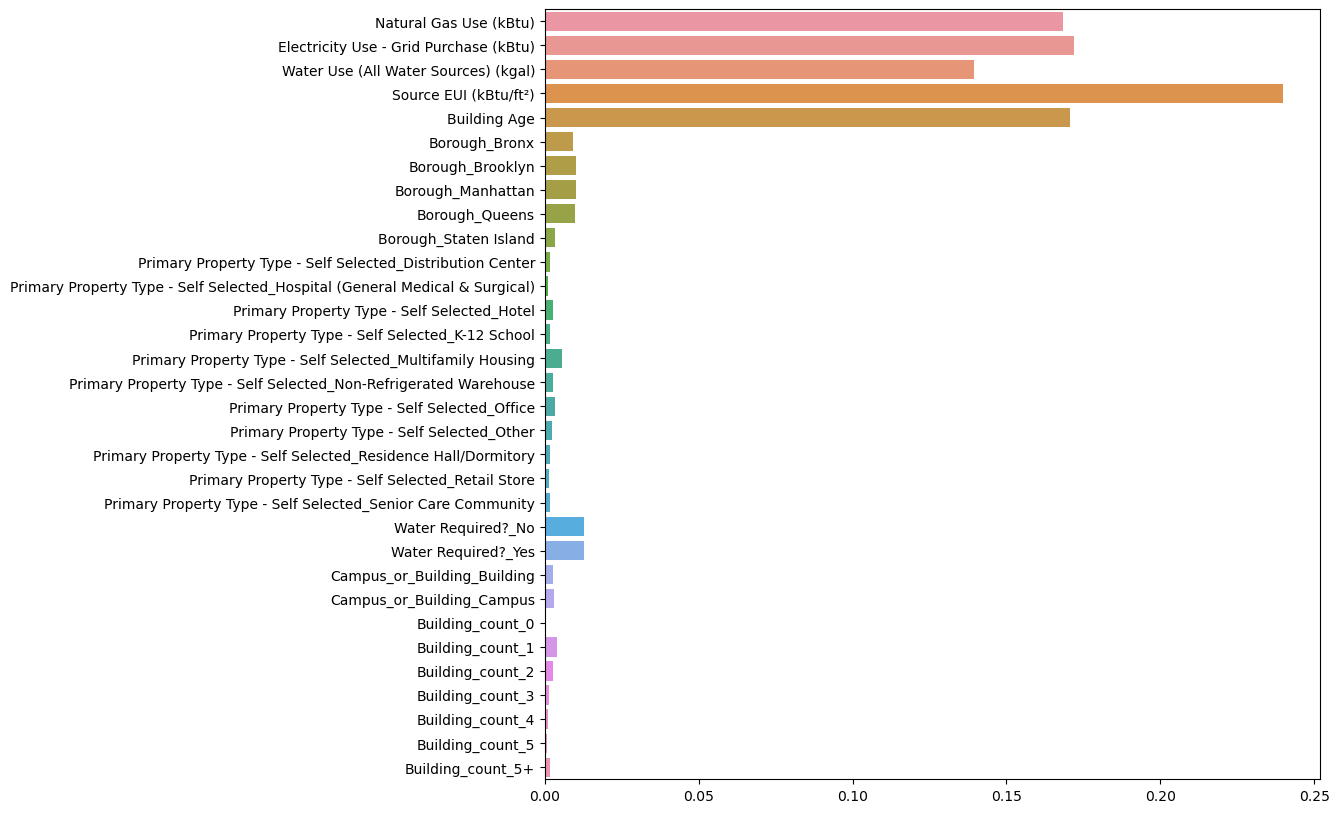

In [70]:
plt.figure(figsize=(10,10))
sns.barplot(y=xc,x=fi)

In [71]:
#Dropping least important features
X = X.drop(columns = ['Building_count_0', 
       'Building_count_3', 'Building_count_4', 'Building_count_5','Primary Property Type - Self Selected_Residence Hall/Dormitory',
       'Primary Property Type - Self Selected_Retail Store','Primary Property Type - Self Selected_Hospital (General Medical & Surgical)'       
                     ])

In [72]:
#Re-splitting after dropping features
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25, random_state = 23)

In [73]:
#Normalizing training set after dropping features
scaler = MinMaxScaler()
sc = scaler.fit_transform(X_train)

In [74]:
cols = X_train.columns
X_train = pd.DataFrame(sc, columns = cols)

## Model Building

In [75]:

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

from sklearn.svm import SVR
svr = SVR()

import xgboost
from xgboost import XGBRegressor
xgbr = XGBRegressor()


In [76]:
model_lr = lr.fit(X_train,y_train)
lr = 'Linear Regression Model'
model_knn = knn.fit(X_train,y_train)
kn = 'KNeighbors Regressor'
model_rfr = rfr.fit(X_train,y_train)
rfr = 'Random Forest Regression Model'
model_gbr = gbr.fit(X_train,y_train)
gbr = 'Gradient Boosting Regression Model'
model_svr = svr.fit(X_train,y_train)
sv = 'Support Vector Regressor'
model_xgbr = xgbr.fit(X_train,y_train)
xgb = 'XGBoost Regressor'

#### Normalizing test set

In [77]:
sc = scaler.transform(X_test)

In [78]:
cols = X_test.columns
X_test = pd.DataFrame(sc, columns = cols)

### Model Evaluation

#### Linear Regression

In [79]:
y_pred_test_lr = model_lr.predict(X_test)
y_pred_train_lr = model_lr.predict(X_train)

In [80]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import math

print(f"Metrics for test set of {lr}")
test_mae_lr = mean_absolute_error(y_test, y_pred_test_lr)
test_mse_lr = mean_squared_error(y_test, y_pred_test_lr)
test_rmse_lr = math.sqrt(test_mse_lr)
test_r2_lr = r2_score(y_test, y_pred_test_lr)
print(f"Mean Absolute Error : {test_mae_lr}")
print(f"Mean Squared Error : {test_mse_lr}")
print(f"Root Mean Squared Error : {test_rmse_lr}")
print(f"R2 Score : {test_r2_lr}")
print('-'*100)

print(f"Metrics for training set of {lr}")
train_mae_lr = mean_absolute_error(y_train, y_pred_train_lr)
train_mse_lr = mean_squared_error(y_train, y_pred_train_lr)
train_rmse_lr = math.sqrt(train_mse_lr)
train_r2_lr = r2_score(y_train,y_pred_train_lr)
print(f"Mean Absolute Error : {train_mae_lr}")
print(f"Mean Squared Error : {train_mse_lr}")
print(f"Root Mean Squared Error : {train_rmse_lr}")
print(f"R2 Score : {train_r2_lr}")
print('-'*100)

Metrics for test set of Linear Regression Model
Mean Absolute Error : 13.189400559819175
Mean Squared Error : 278.05802339340477
Root Mean Squared Error : 16.67507191568914
R2 Score : 0.6852241376870186
----------------------------------------------------------------------------------------------------
Metrics for training set of Linear Regression Model
Mean Absolute Error : 13.010064125595905
Mean Squared Error : 268.3375773298827
Root Mean Squared Error : 16.381012707701643
R2 Score : 0.7003848234514816
----------------------------------------------------------------------------------------------------


#### K Nearest Neighbors

In [82]:
y_pred_test_knn = model_knn.predict(X_test)
y_pred_train_knn = model_knn.predict(X_train)

In [83]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import math

print(f"Metrics for test set of {kn}")
test_mae_knn = mean_absolute_error(y_test, y_pred_test_knn)
test_mse_knn = mean_squared_error(y_test, y_pred_test_knn)
test_rmse_knn = math.sqrt(test_mse_knn)
test_r2_knn = r2_score(y_test, y_pred_test_knn)
print(f"Mean Absolute Error : {test_mae_knn}")
print(f"Mean Squared Error : {test_mse_knn}")
print(f"Root Mean Squared Error : {test_rmse_knn}")
print(f"R2 Score : {test_r2_knn}")
print('-'*100)

print(f"Metrics for training set of {kn}")
train_mae_knn = mean_absolute_error(y_train, y_pred_train_knn)
train_mse_knn = mean_squared_error(y_train, y_pred_train_knn)
train_rmse_knn = math.sqrt(train_mse_knn)
train_r2_knn = r2_score(y_train,y_pred_train_knn)
print(f"Mean Absolute Error : {train_mae_knn}")
print(f"Mean Squared Error : {train_mse_knn}")
print(f"Root Mean Squared Error : {train_mse_knn}")
print(f"R2 Score : {train_r2_knn}")
print('-'*100)


Metrics for test set of KNeighbors Regressor
Mean Absolute Error : 13.044070647603029
Mean Squared Error : 318.6460891505467
Root Mean Squared Error : 17.85066074829015
R2 Score : 0.639276377423168
----------------------------------------------------------------------------------------------------
Metrics for training set of KNeighbors Regressor
Mean Absolute Error : 10.13693213684801
Mean Squared Error : 196.89271452607966
Root Mean Squared Error : 196.89271452607966
R2 Score : 0.7801573450470334
----------------------------------------------------------------------------------------------------


#### Random Forest Regressor

In [84]:
y_pred_test_rfr = model_rfr.predict(X_test)
y_pred_train_rfr = model_rfr.predict(X_train)

In [85]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import math

print(f"Metrics for test set of {rfr}")
test_mae_rfr = mean_absolute_error(y_test, y_pred_test_rfr)
test_mse_rfr = mean_squared_error(y_test, y_pred_test_rfr)
test_rmse_rfr = math.sqrt(test_mse_rfr)
test_r2_rfr = r2_score(y_test, y_pred_test_rfr)
print(f"Mean Absolute Error : {test_mae_rfr}")
print(f"Mean Squared Error : {test_mse_rfr}")
print(f"Root Mean Squared Error : {test_rmse_rfr}")
print(f"R2 Score : {test_r2_rfr}")
print('-'*100)

print(f"Metrics for training set of {rfr}")
train_mae_rfr = mean_absolute_error(y_train, y_pred_train_rfr)
train_mse_rfr = mean_squared_error(y_train, y_pred_train_rfr)
train_rmse_rfr = math.sqrt(train_mse_rfr)
train_r2_rfr = r2_score(y_train,y_pred_train_rfr)
print(f"Mean Absolute Error : {train_mae_rfr}")
print(f"Mean Squared Error : {train_mse_rfr}")
print(f"Root Mean Squared Error : {train_rmse_rfr}")
print(f"R2 Score : {train_r2_rfr}")
print('-'*100)

Metrics for test set of Random Forest Regression Model
Mean Absolute Error : 9.65609791141015
Mean Squared Error : 188.99982211563173
Root Mean Squared Error : 13.747720615274073
R2 Score : 0.7860425631405853
----------------------------------------------------------------------------------------------------
Metrics for training set of Random Forest Regression Model
Mean Absolute Error : 3.5597196672275193
Mean Squared Error : 27.03974377211473
Root Mean Squared Error : 5.199975362644974
R2 Score : 0.9698084864418777
----------------------------------------------------------------------------------------------------


#### Gradient Boosting Regressor

In [86]:
y_pred_test_gbr = model_gbr.predict(X_test)
y_pred_train_gbr = model_gbr.predict(X_train)

In [87]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import math

print(f"Metrics for test set of {gbr}")
test_mae_gbr = mean_absolute_error(y_test, y_pred_test_gbr)
test_mse_gbr = mean_squared_error(y_test, y_pred_test_gbr)
test_rmse_gbr = math.sqrt(test_mse_gbr)
test_r2_gbr = r2_score(y_test, y_pred_test_gbr)
print(f"Mean Absolute Error : {test_mae_gbr}")
print(f"Mean Squared Error : {test_mse_gbr}")
print(f"Root Mean Squared Error : {test_rmse_gbr}")
print(f"R2 Score : {test_r2_gbr}")
print('-'*100)

print(f"Metrics for training set of {gbr}")
train_mae_gbr = mean_absolute_error(y_train, y_pred_train_gbr)
train_mse_gbr = mean_squared_error(y_train, y_pred_train_gbr)
train_rmse_gbr = math.sqrt(train_mse_gbr)
train_r2_gbr = r2_score(y_train,y_pred_train_gbr)
print(f"Mean Absolute Error : {train_mae_gbr}")
print(f"Mean Squared Error : {train_mse_gbr}")
print(f"Root Mean Squared Error : {train_rmse_gbr}")
print(f"R2 Score : {train_r2_gbr}")
print('-'*100)

Metrics for test set of Gradient Boosting Regression Model
Mean Absolute Error : 9.425597123423248
Mean Squared Error : 178.4536048000945
Root Mean Squared Error : 13.358652806330978
R2 Score : 0.7979814189560909
----------------------------------------------------------------------------------------------------
Metrics for training set of Gradient Boosting Regression Model
Mean Absolute Error : 8.937638082428483
Mean Squared Error : 161.19863090239465
Root Mean Squared Error : 12.696402281843257
R2 Score : 0.8200119538314774
----------------------------------------------------------------------------------------------------


#### Support Vector Regressor

In [88]:
y_pred_test_svr = model_svr.predict(X_test)
y_pred_train_svr = model_svr.predict(X_train)

In [89]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import math

print(f"Metrics for test set of {sv}")
test_mae_svr = mean_absolute_error(y_test, y_pred_test_svr)
test_mse_svr = mean_squared_error(y_test, y_pred_test_svr)
test_rmse_svr = math.sqrt(test_mse_svr)
test_r2_svr = r2_score(y_test, y_pred_test_svr)
print(f"Mean Absolute Error : {test_mae_svr}")
print(f"Mean Squared Error : {test_mse_svr}")
print(f"Root Mean Squared Error : {test_rmse_svr}")
print(f"R2 Score : {test_r2_svr}")
print('-'*100)

print(f"Metrics for training set of {sv}")
train_mae_svr = mean_absolute_error(y_train, y_pred_train_svr)
train_mse_svr = mean_squared_error(y_train, y_pred_train_svr)
train_rmse_svr = math.sqrt(train_mse_svr)
train_r2_svr = r2_score(y_train,y_pred_train_svr)
print(f"Mean Absolute Error : {train_mae_svr}")
print(f"Mean Squared Error : {train_mse_svr}")
print(f"Root Mean Squared Error : {train_rmse_svr}")
print(f"R2 Score : {train_r2_svr}")
print('-'*100)

Metrics for test set of Support Vector Regressor
Mean Absolute Error : 13.60871616322927
Mean Squared Error : 310.1124886006002
Root Mean Squared Error : 17.610011033517278
R2 Score : 0.6489368484247311
----------------------------------------------------------------------------------------------------
Metrics for training set of Support Vector Regressor
Mean Absolute Error : 13.207184907964312
Mean Squared Error : 294.0465892481327
Root Mean Squared Error : 17.147786715729023
R2 Score : 0.6716791527011456
----------------------------------------------------------------------------------------------------


#### XGBoost Regressor

In [90]:
y_pred_test_xgbr = model_xgbr.predict(X_test)
y_pred_train_xgbr = model_xgbr.predict(X_train)

In [91]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score
import math

print(f"Metrics for test set of {xgb}")
test_mae_xgbr = mean_absolute_error(y_test, y_pred_test_xgbr)
test_mse_xgbr = mean_squared_error(y_test, y_pred_test_xgbr)
test_rmse_xgbr = math.sqrt(test_mse_xgbr)
test_r2_xgbr = r2_score(y_test, y_pred_test_xgbr)
print(f"Mean Absolute Error : {test_mae_xgbr}")
print(f"Mean Squared Error : {test_mse_xgbr}")
print(f"Root Mean Squared Error : {test_rmse_xgbr}")
print(f"R2 Score : {test_r2_xgbr}")
print('-'*100)

print(f"Metrics for training set of {xgb}")
train_mae_xgbr = mean_absolute_error(y_train, y_pred_train_xgbr)
train_mse_xgbr = mean_squared_error(y_train, y_pred_train_xgbr)
train_rmse_xgbr = math.sqrt(train_mse_xgbr)
train_r2_xgbr = r2_score(y_train,y_pred_train_xgbr)
print(f"Mean Absolute Error : {train_mae_xgbr}")
print(f"Mean Squared Error : {train_mse_xgbr}")
print(f"Root Mean Squared Error : {train_rmse_xgbr}")
print(f"R2 Score : {train_r2_xgbr}")
print('-'*100)

Metrics for test set of XGBoost Regressor
Mean Absolute Error : 9.865822799485004
Mean Squared Error : 193.01137436520494
Root Mean Squared Error : 13.892853355779904
R2 Score : 0.7815012814211708
----------------------------------------------------------------------------------------------------
Metrics for training set of XGBoost Regressor
Mean Absolute Error : 5.111273509305831
Mean Squared Error : 52.332096241234
Root Mean Squared Error : 7.234092634272387
R2 Score : 0.9415680412319006
----------------------------------------------------------------------------------------------------


### Model Evaluation

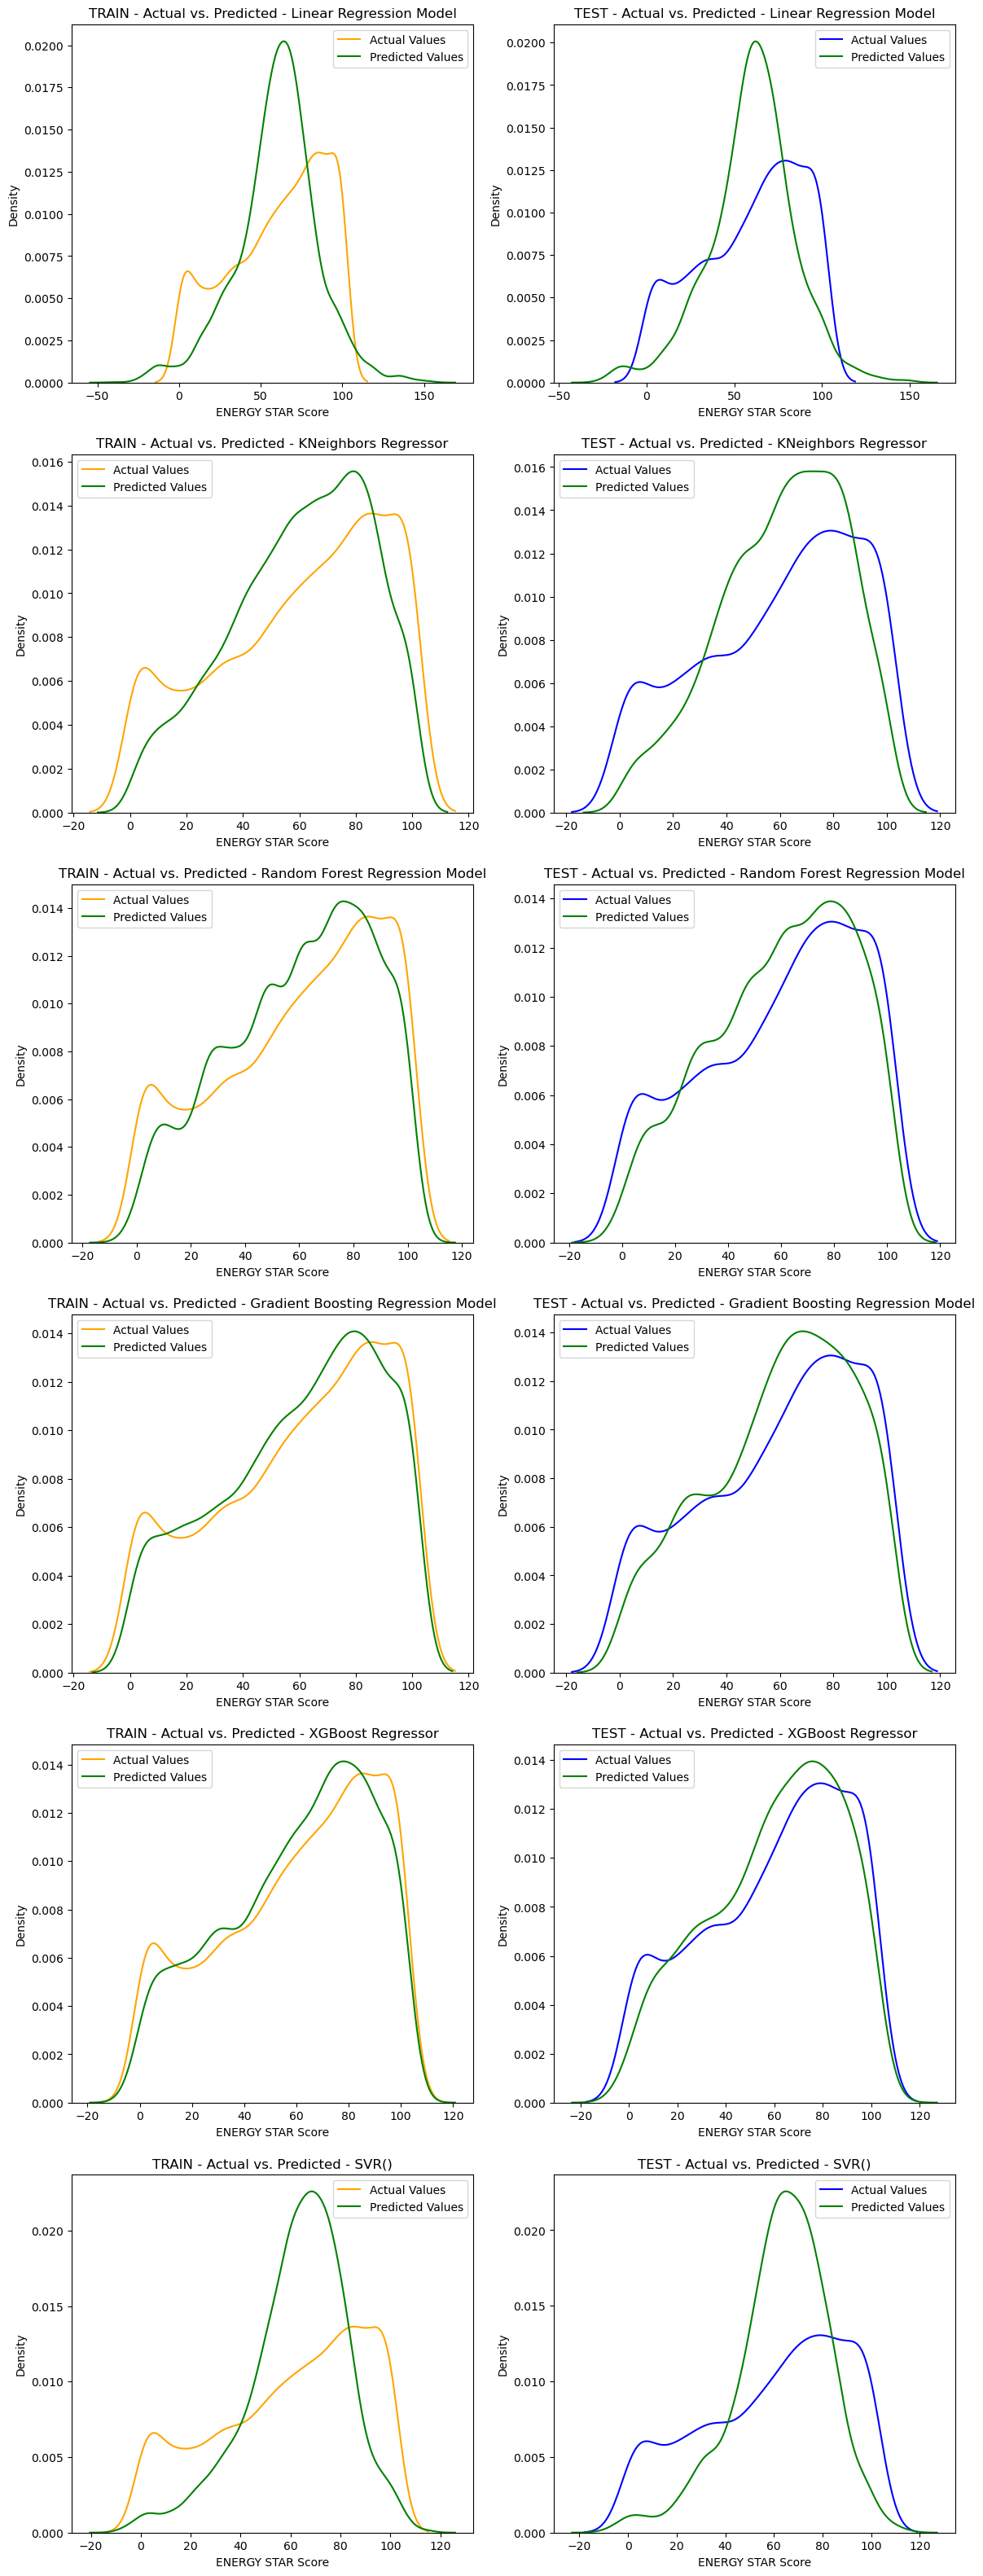

In [92]:
# Creating Plots to compare Actual and Predicted values
test_pred = [y_pred_test_lr, y_pred_test_knn,y_pred_test_gbr,y_pred_test_rfr,y_pred_test_xgbr,y_pred_test_svr]
train_pred = [y_pred_train_lr, y_pred_train_knn,y_pred_train_gbr,y_pred_train_rfr,y_pred_train_xgbr,y_pred_train_svr]
models = [lr,kn,rfr,gbr,xgb,svr]
f,axes = plt.subplots(6,2,figsize=(14, 40))
r=0
c=0
for i in range(len(train_pred)):
    ax = sns.kdeplot(data=y_test, label="Actual Values", color="blue", shade=False,ax=axes[r,1])
    ax = sns.kdeplot(data=test_pred[i], label="Predicted Values", color="green", shade=False,ax=axes[r,1])
    ax.set_title(f"TEST - Actual vs. Predicted - {models[i]}")
    ax.legend()
    ax = sns.kdeplot(data=y_train, label="Actual Values", color="orange", shade=False,ax=axes[r,0])
    ax = sns.kdeplot(data=train_pred[i], label="Predicted Values", color="green", shade=False,ax=axes[r,0])
    ax.set_title(f"TRAIN - Actual vs. Predicted - {models[i]}")
    ax.legend()
    r=r+1


From the above visual and also from the metrics, it can be seen that Random Forest, XGBoost and Gradient Boosting models are giving better results when comparing Actual and predicted values.

However, we shall compare Mean Absolute Error to find the best performing model.

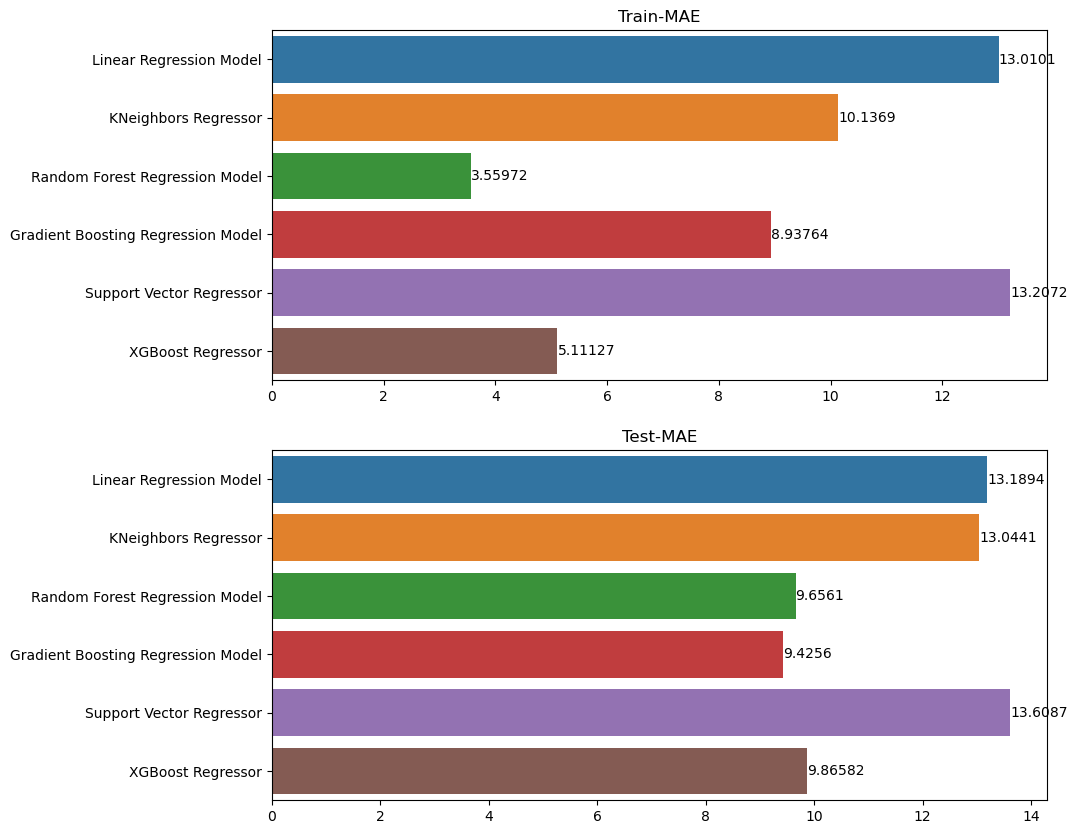

In [93]:
#Comparing Mean Absolute Error
models = [lr,kn,rfr,gbr,sv,xgb]
train_results = [train_mae_lr, train_mae_knn,train_mae_rfr,train_mae_gbr,train_mae_svr,train_mae_xgbr]
test_results = [test_mae_lr,test_mae_knn,test_mae_rfr,test_mae_gbr,test_mae_svr,test_mae_xgbr]
f,axes = plt.subplots(2,1,figsize=(10,10))
ax = sns.barplot(x = train_results,y=models,ax=axes[0])
ax.set_title("Train-MAE")
for i in ax.containers:
    ax.bar_label(i)
ax = sns.barplot(x = test_results,y=models,ax=axes[1])
ax.set_title("Test-MAE")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

Random Forest and XGBoost models have very low MAE for training data but higher MAE for test data. These models are clearly overfitting. Gradient Boosting model is not overfitting and has low MAE for both training and test sets. 

Comparing performance of Random Forest and XGBoost using K-fold Cross Validation

### K-Fold Cross Validation

In [94]:
#Random Forest Model Cross Validation
from sklearn.model_selection import cross_val_score

train_scores_rfr = cross_val_score(model_rfr,X_train,y_train,cv=10,scoring='neg_mean_absolute_error')
test_scores_rfr = cross_val_score(model_rfr,X_test,y_test,cv=10,scoring='neg_mean_absolute_error')

train_avg_rfr = train_scores_rfr.mean()
test_avg_rfr = test_scores_rfr.mean()
   
print(f"Training Average : {train_avg_rfr}")
print(f"Training scores : {train_scores_rfr}")
print("-"*100)
print(f"Test Average : {test_avg_rfr}")
print(f"Test scores : {test_scores_rfr}")

Training Average : -9.558939705424013
Training scores : [ -9.45531629  -9.32685387  -9.61823282  -9.11306646  -9.8079453
 -10.19176718  -8.96414165  -9.49340954 -10.16489114  -9.45377279]
----------------------------------------------------------------------------------------------------
Test Average : -10.128538949757118
Test scores : [-10.59911765  -9.49063025  -9.98042017 -10.19932773  -9.91361345
 -10.74138655 -10.07226891 -10.17592437 -10.29299578  -9.81970464]


In [95]:
#XGBoost Model Cross Validation
from sklearn.model_selection import cross_val_score

train_scores_xgbr = cross_val_score(model_xgbr,X_train,y_train,cv=10,scoring='neg_mean_absolute_error')
test_scores_xgbr = cross_val_score(model_xgbr,X_test,y_test,cv=10,scoring='neg_mean_absolute_error')

train_avg_xgbr = train_scores_xgbr.mean()
test_avg_xgbr = test_scores_xgbr.mean()
   
print(f"Training Average : {train_avg_xgbr}")
print(f"Training scores : {train_scores_xgbr}")
print("-"*100)
print(f"Test Average : {test_avg_xgbr}")
print(f"Test scores : {test_scores_xgbr}")

Training Average : -9.876585709780489
Training scores : [ -9.82374491  -9.8033206   -9.77193651  -9.38294476 -10.37885887
 -10.05874075  -9.62438228  -9.80380995 -10.49925175  -9.61886671]
----------------------------------------------------------------------------------------------------
Test Average : -10.76176289515681
Test scores : [-11.3529129  -10.49970814 -10.70349067 -10.76889948 -10.71609341
 -11.24123029 -10.29771291 -10.29422844 -11.06773951 -10.67561319]


It can be said that after cross validation, the overfitting in Random Forest and XGBoost models has reduced. However, the mean absolute error in training data is not lesser than Gradient Boosting Model.

## Conclusion

It can be concluded that Gradient Boosting Regressor model is the best performing model for the given dataset. 

- It has Mean Absolute Error of 8.93 for training data and 9.42 for testing data
- The R2 score for training data is around 82% and for testing data is around 80% indicating a high accuracy 

Therefore, we can presume that this model can give 70% to 80% accuracy on completely unknown data.
